Join the data from Part 1 with the data from Part 2 to create a new dataframe.

As we have taken each station's lat long from Part 1 to build our poi dataframe in part 2, we can use that for this exercise:

In [1]:
import requests
import os
import json
import pandas as pd
FOURSQUARE_API_KEY = os.environ.get("FOURSQUARE_API_KEY")
YELP_API_KEY = os.environ.get("YELP_API_KEY")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We bring part 1 here
%run city_bikes.ipynb

In [3]:
# Load the pickle file from part 2 (unable to use import-ipynb and %run)
bikes_foursquare_df = pd.read_pickle(r'C:\Users\mahmu\LHL\Statistical-Modelling-Project\data\fs_pois_data.pkl')

In [4]:
bikes_foursquare_df.head()

,station_name,name,latitude,longitude,category,distance
0,Summerhill Ave / Maclennan Ave,Dolce Bakery,43.685924,-79.376304,restaurant,38
1,Summerhill Ave / Maclennan Ave,Ashbury Cleaners,43.685924,-79.376304,bar,24
2,Summerhill Ave / Maclennan Ave,Rosedale's Finest,43.685924,-79.376304,bar,27
3,Summerhill Ave / Maclennan Ave,Rosedale 1 Hour Cleaners,43.685924,-79.376304,bar,39
4,Summerhill Ave / Maclennan Ave,Dolce Bakery,43.685924,-79.376304,bar,38


As we can see, for each stations, we get nearby restaurants, bars and banks within 50 meters.

In [5]:
# There are 2101 rows and 6 columns
bikes_foursquare_df.shape

(2101, 6)

In [6]:
# Restaurants, bars and banks are all under the category column, for our analysis we need to seperate them
bikes_foursquare_df.dtypes

station_name     object
name             object
latitude        float64
longitude       float64
category         object
distance          int64
dtype: object

In [7]:
# Rename "name" to "institution_name" for clarity
bikes_foursquare_df.rename(columns={'name': 'institution name'}, inplace=True)

In [8]:
# Create separate columns for each category
category_dummies = pd.get_dummies(bikes_foursquare_df['category'])

In [9]:
# Combine the original DataFrame with the category dummies
df_combined = pd.concat([bikes_foursquare_df, category_dummies], axis=1)

In [10]:
# Group by station_name and sum the counts of each category
df_summary = df_combined.groupby(['station_name', 'latitude', 'longitude'], as_index=False).sum()

In [11]:
# Rename the columns to reflect the counts
df_summary.rename(columns={
    'restaurant': 'restaurant_count',
    'bar': 'bar_count',
    'bank': 'bank_count'
}, inplace=True)

In [12]:
# Add a new column "total_count" by summing the counts of banks, bars, and restaurants
df_summary['total_institutions'] = (
    df_summary['restaurant_count'] + 
    df_summary['bar_count'] + 
    df_summary['bank_count']
)

Now we get a complete dataframe which contains each stations and its nearby intitutions of our interest

In [13]:
df_summary.head(10)

,station_name,latitude,longitude,institution name,category,distance,bank_count,bar_count,restaurant_count,total_institutions
0,1 Market St,43.646993,-79.370666,The Market Club,bar,27,0,1,0,1
1,111 Bond St (North of Dundas St E) - SMART,43.656927,-79.378497,The HummussiahLocalista Food Truck,restaurantrestaurant,71,0,0,2,2
2,111 Broadview Ave,43.659348,-79.349937,Liberty ShawarmaRooftop at Broadview HotelEast...,restaurantbarbarbarbarbarbank,269,1,5,1,7
3,12 Harbour St,43.642564,-79.376200,Ahmed Chips WagonThe Butcher ChefLow Town,restaurantrestaurantbar,110,0,1,2,3
4,128 Sterling Rd - SMART,43.654004,-79.444792,Lazarus & the Dive bar,bar,42,0,1,0,1
5,1303 Yonge St - SMART,43.684618,-79.392459,B & B Fine FoodsAsianTorontoEscorts,restaurantbar,33,0,1,1,2
6,15 Price St,43.679948,-79.389948,TerroniTerroniBar Centrale di Terroni,restaurantbarbar,147,0,2,1,3
7,1525 Dundas St W,43.649570,-79.432446,The MuttThe DerbyBlanc 4,barbarbar,98,0,3,0,3
8,1612 Danforth Ave,43.683708,-79.322625,Sunset GrillTKO's the Sports PubSunset GrillA&...,restaurantbarbarbarbank,211,1,3,1,5
9,19 Glendora Ave,43.759211,-79.409604,Yama SushiAlisa Mazo Barrister & SolicitorBarg...,barbarbarbarbankbank,258,2,4,0,6


In [14]:
# It only has 444 unique stations, meaning out of 852 stations only 444 has nearby establishments of our interest
df_summary.shape

(444, 10)

In [17]:
# Perform a left join on df_bike and df_summary
df_combined = pd.merge(
    df_bike,
    df_summary,
    on=['station_name', 'latitude', 'longitude'],  
    how='left'
)

# Columns we want in our final dataframe
df_combined = df_combined[[
    'station_name', 'latitude', 'longitude', 'total_bikes', 
    'institution name', 'category', 'distance', 
    'bank_count', 'bar_count', 'restaurant_count', 'total_institutions'
]]

In [18]:
# Checking our new dataframe
df_combined.head()

,station_name,latitude,longitude,total_bikes,institution name,category,distance,bank_count,bar_count,restaurant_count,total_institutions
0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,11,Dolce BakeryAshbury CleanersRosedale's FinestR...,restaurantbarbarbarbarbank,209.0,1.0,4.0,1.0,6.0
1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,18,Il CucinaTD Bank Financial GroupTD Canada Trus...,restaurantbankbank,74.0,2.0,0.0,1.0,3.0
3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,8,Mr. GreekKibo SushiKibo SushiBlue Fin Sushi Bar,restaurantrestaurantbarbar,128.0,0.0,2.0,2.0,4.0
4,420 Wellington St W,43.643834,-79.396649,15,Le Select BistroMira RestaurantLe Select Bistr...,restaurantrestaurantbarbarbarbarbar,179.0,0.0,5.0,2.0,7.0


In [19]:
# Now we have all stations, but for stations which don't have data from the API, we get NaN
df_combined.shape

(852, 11)

In [20]:
# Saved for later usage
# df_combined.to_csv('df_combined_data.csv', index=False)
# df_combined.to_pickle('df_combined_data.pkl')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

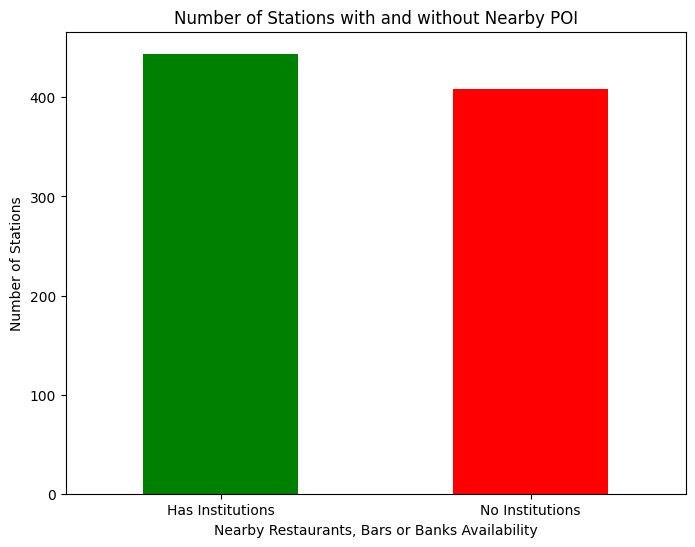

In [26]:
# Count the number of stations with and without our Places of Interest (POI)
institution_counts = df_combined['total_institutions'].notna().value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
institution_counts.plot(kind='bar', color=['green', 'red'])

# Add labels and title
plt.title('Number of Stations with and without Nearby POI')
plt.xlabel('Nearby Restaurants, Bars or Banks Availability')
plt.ylabel('Number of Stations')
plt.xticks(ticks=[0, 1], labels=['Has Institutions', 'No Institutions'], rotation=0)


plt.show()

As we can see, almost half the stations don't have our choosen point of interest places (ie. restaurants, bars or banks) nearby.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [27]:
import sqlite3

In [28]:
# Selecting the project's data/ directory
db_path = r'C:\Users\mahmu\LHL\Statistical-Modelling-Project\data\stations_institutions.db'

In [32]:
conn = sqlite3.connect(db_path)

In [30]:
df_combined.to_sql('stations_institutions', conn, if_exists='replace', index=False)

852

In [31]:
conn.close()

Look at the data before and after the join to validate your data.

In [33]:
conn = sqlite3.connect(db_path)

In [42]:
query = 'SELECT * FROM stations_institutions;'
df_sql = pd.read_sql_query(query, conn) 
# We read our sql query and put result in a database called df_sql

In [44]:
df_sql.shape # Shape of our SQL database

(852, 11)

In [49]:
df_combined.shape # Shape of our joined dataframe

(852, 11)

As we can see, our SQL database "df_sql" has 852 rows and 11 columns, which are identical to our df_combined database. We can also see that both has the same first 5 results.

In [50]:
df_sql.head() # First 5 result of our SQL database

,station_name,latitude,longitude,total_bikes,institution name,category,distance,bank_count,bar_count,restaurant_count,total_institutions
0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,11,Dolce BakeryAshbury CleanersRosedale's FinestR...,restaurantbarbarbarbarbank,209.0,1.0,4.0,1.0,6.0
1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,18,None,None,NaN,NaN,NaN,NaN,NaN
2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,18,Il CucinaTD Bank Financial GroupTD Canada Trus...,restaurantbankbank,74.0,2.0,0.0,1.0,3.0
3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,8,Mr. GreekKibo SushiKibo SushiBlue Fin Sushi Bar,restaurantrestaurantbarbar,128.0,0.0,2.0,2.0,4.0
4,420 Wellington St W,43.643834,-79.396649,15,Le Select BistroMira RestaurantLe Select Bistr...,restaurantrestaurantbarbarbarbarbar,179.0,0.0,5.0,2.0,7.0


In [51]:
df_combined.head() # First 5 result of our joined dataframe

,station_name,latitude,longitude,total_bikes,institution name,category,distance,bank_count,bar_count,restaurant_count,total_institutions
0,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,11,Dolce BakeryAshbury CleanersRosedale's FinestR...,restaurantbarbarbarbarbank,209.0,1.0,4.0,1.0,6.0
1,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,18,Il CucinaTD Bank Financial GroupTD Canada Trus...,restaurantbankbank,74.0,2.0,0.0,1.0,3.0
3,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,8,Mr. GreekKibo SushiKibo SushiBlue Fin Sushi Bar,restaurantrestaurantbarbar,128.0,0.0,2.0,2.0,4.0
4,420 Wellington St W,43.643834,-79.396649,15,Le Select BistroMira RestaurantLe Select Bistr...,restaurantrestaurantbarbarbarbarbar,179.0,0.0,5.0,2.0,7.0


We can also compare the summary statistics of both and can see that both are identical

In [55]:
df_combined.describe() # Statistics of our joined dataframe

,latitude,longitude,total_bikes,distance,bank_count,bar_count,restaurant_count,total_institutions
count,852.000000,852.000000,852.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,43.674017,-79.394347,18.392019,161.148649,0.533784,2.567568,1.630631,4.731982
std,0.036710,0.066238,7.165909,134.390860,1.134811,2.332890,1.845881,3.999183
min,43.588077,-79.568250,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,43.649516,-79.431257,14.000000,56.750000,0.000000,1.000000,1.000000,2.000000
50%,43.664024,-79.394175,17.000000,121.500000,0.000000,2.000000,1.000000,3.000000
75%,43.688572,-79.364703,21.000000,229.250000,1.000000,4.000000,2.000000,7.000000
max,43.792363,-79.123184,63.000000,703.000000,7.000000,10.000000,10.000000,23.000000


In [56]:
df_sql.describe() # Statistics of our SQL database

,latitude,longitude,total_bikes,distance,bank_count,bar_count,restaurant_count,total_institutions
count,852.000000,852.000000,852.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,43.674017,-79.394347,18.392019,161.148649,0.533784,2.567568,1.630631,4.731982
std,0.036710,0.066238,7.165909,134.390860,1.134811,2.332890,1.845881,3.999183
min,43.588077,-79.568250,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,43.649516,-79.431257,14.000000,56.750000,0.000000,1.000000,1.000000,2.000000
50%,43.664024,-79.394175,17.000000,121.500000,0.000000,2.000000,1.000000,3.000000
75%,43.688572,-79.364703,21.000000,229.250000,1.000000,4.000000,2.000000,7.000000
max,43.792363,-79.123184,63.000000,703.000000,7.000000,10.000000,10.000000,23.000000


In [52]:
conn.close()